In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import xgboost as xgb
import seaborn as sns

## Load Data

In [2]:
df1 = pd.read_csv('loan_2014.csv')

c:\users\tong\anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1.shape

(235631, 105)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235631 entries, 0 to 235630
Columns: 105 entries, percentbcgt75 to loanstatus
dtypes: float64(85), object(20)
memory usage: 188.8+ MB


## Select Data

In [5]:
df1.count()

percentbcgt75                 233072
emptitle                      222393
mthssincerecentrevoldelinq     84766
verificationstatusjoint            0
mthssincercntil                    0
openactil                          0
loanamnt                      235629
desc                           15279
collections12mthsexmed        235629
pubrecbankruptcies            235629
numactvrevtl                  235629
memberid                           0
term                          235629
taxliens                      235629
totalcutl                          0
numiltl                       235629
secappopenactil                    0
totalrevhilim                 235629
delinq2yrs                    235629
accnowdelinq                  235629
allutil                            0
avgcurbal                     235623
dti                           235629
accopenpast24mths             235629
numbctl                       235629
numtl120dpd2m                 227769
revolbal                      235629
t

In [6]:
# get all_null_feature from EDA
all_null_feature = ['verificationstatusjoint',
 'mthssincercntil',
 'openactil',
 'memberid',
 'totalcutl',
 'secappopenactil',
 'allutil',
 'secappinqlast6mths',
 'secappchargeoffwithin12mths',
 'secapprevolutil',
 'inqlast12m',
 'secappmortacc',
 'openrv12m',
 'secappcollections12mthsexmed',
 'openacc6m',
 'secappopenacc',
 'revolbaljoint',
 'secappnumrevaccts',
 'secappmthssincelastmajorderog',
 'maxbalbc',
 'openil24m',
 'secappearliestcrline',
 'annualincjoint',
 'dtijoint',
 'openil12m',
 'inqfi',
 'ilutil',
 'totalbalil',
 'openrv24m']

In [7]:
cat_feature = ['emptitle',
 'desc',
 'term',
 'id',
 'zipcode',
 'intrate',
 'initialliststatus',
 'homeownership',
 'grade',
 'revolutil',
 'applicationtype',
 'emplength',
 'addrstate',
 'disbursementmethod',
 'subgrade',
 'earliestcrline',
 'purpose',
 'verificationstatus',
 'issued',
 'loanstatus']

In [8]:
num_feature = ['percentbcgt75',
 'mthssincerecentrevoldelinq',
 'loanamnt',
 'collections12mthsexmed',
 'pubrecbankruptcies',
 'numactvrevtl',
 'taxliens',
 'numiltl',
 'totalrevhilim',
 'delinq2yrs',
 'accnowdelinq',
 'avgcurbal',
 'dti',
 'accopenpast24mths',
 'numbctl',
 'numtl120dpd2m',
 'revolbal',
 'totcurbal',
 'totalacc',
 'openacc',
 'fundedamnt',
 'tothicredlim',
 'numsats',
 'mosinoldilacct',
 'mthssincelastdelinq',
 'delinqamnt',
 'totalbclimit',
 'chargeoffwithin12mths',
 'mthssincerecentinq',
 'numrevtlbalgt0',
 'numtl90gdpd24m',
 'mthssincelastmajorderog',
 'mthssincerecentbc',
 'totalbalexmort',
 'numacctsever120pd',
 'mosinrcntrevtlop',
 'mthssincerecentbcdlq',
 'numtl30dpd',
 'numtloppast12m',
 'mosinrcnttl',
 'numbcsats',
 'pcttlnvrdlq',
 'installment',
 'mortacc',
 'numactvbctl',
 'mosinoldrevtlop',
 'numrevaccts',
 'mthssincelastrecord',
 'pubrec',
 'bcopentobuy',
 'totcollamt',
 'inqlast6mths',
 'totalilhighcreditlimit',
 'annualinc',
 'bcutil',
 'numoprevtl']

In [9]:
select_feature=cat_feature+num_feature
len(select_feature)

76

In [10]:
# remove applicationtype since it only has one value as 'individual'
# remove disbursementmethod since it only has one value as 'cash'

cat_feature.remove('applicationtype')
cat_feature.remove('disbursementmethod')

In [11]:
# remove fundedamnt since it always equals to 1 for issued loans and varied during different time of a current loan

num_feature.remove('fundedamnt')

In [12]:
# remove 'id','issued' and 'loanstatus' from ob_feature, since they are index, train/test flag and target
cat_feature.remove('id')
cat_feature.remove('loanstatus')
cat_feature.remove('issued')

In [13]:
# remove 'desc' from ob_feature and select_feature
cat_feature.remove('desc')

In [14]:
select_feature=cat_feature+num_feature
len(select_feature)

69

In [15]:
# selected features left and delete the last two rows
df=df1[select_feature+['loanstatus','issued']][:-2]

In [16]:
df.shape

(235629, 71)

## only use term=36 months and loanstatus = fully paid and charged off

In [17]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [18]:
df = df.query("term ==' 36 months'")

In [19]:
df.shape

(162474, 71)

In [20]:
cat_feature.remove('term')

## Label Target

In [21]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [22]:
print (df.loanstatus.value_counts())
print (df.loanstatus.value_counts(normalize=True))

0    140202
1     22272
Name: loanstatus, dtype: int64
0    0.86292
1    0.13708
Name: loanstatus, dtype: float64


In [23]:
df.head()

,emptitle,term,zipcode,intrate,initialliststatus,homeownership,grade,revolutil,emplength,addrstate,...,pubrec,bcopentobuy,totcollamt,inqlast6mths,totalilhighcreditlimit,annualinc,bcutil,numoprevtl,loanstatus,issued
1,Truck Driver Delivery Personel,36 months,937xx,6.99%,w,MORTGAGE,A,31.6%,8 years,CA,...,0.0,7599.0,0.0,2.0,11325.0,58000.0,41.5,14.0,1,Dec-2014
3,Technical Specialist,36 months,850xx,13.66%,f,RENT,C,91.9%,< 1 year,AZ,...,0.0,332.0,0.0,1.0,64031.0,50000.0,93.2,4.0,1,Dec-2014
5,Admin Specialist,36 months,077xx,13.66%,f,RENT,C,59.4%,10+ years,NJ,...,0.0,6494.0,0.0,0.0,24890.0,69000.0,69.2,8.0,0,Dec-2014
7,Store Manager,36 months,208xx,11.44%,f,RENT,B,20.2%,2 years,MD,...,0.0,12152.0,0.0,0.0,6000.0,26000.0,26.8,6.0,0,Dec-2014
9,Investment Consultant,36 months,483xx,11.99%,f,RENT,B,98%,8 years,MI,...,0.0,324.0,0.0,1.0,0.0,90000.0,98.5,5.0,1,Dec-2014


## Out of time testing set and in-time training set: Oct~Dec as test)

In [24]:
issued=list(df['issued'].unique())
issued

['Dec-2014',
 'Nov-2014',
 'Oct-2014',
 'Sep-2014',
 'Aug-2014',
 'Jul-2014',
 'Jun-2014',
 'May-2014',
 'Apr-2014',
 'Mar-2014',
 'Feb-2014',
 'Jan-2014']

In [25]:
df['train_flg'] = df.issued.apply(lambda x: 0 if x in issued[:3] else 1)
df.train_flg.value_counts()

1    112548
0     49926
Name: train_flg, dtype: int64

## Feature Engineering & Cleaning

#### Datetime to numeric feature

In [26]:
df.earliestcrline.unique()[:5]

array(['Sep-1989', 'Aug-2002', 'Nov-1992', 'May-2009', 'Jul-2003'], dtype=object)

In [27]:
# convert to number of months to Dec 2014

cl_month=df.earliestcrline.apply(lambda x: x.split('-')[0])
cl_year=df.earliestcrline.apply(lambda x: int(x.split('-')[1]))

In [28]:
cl_month.unique()

array(['Sep', 'Aug', 'Nov', 'May', 'Jul', 'Oct', 'Jan', 'Jun', 'Dec',
       'Feb', 'Apr', 'Mar'], dtype=object)

In [29]:
cl_year.unique()

array([1989, 2002, 1992, 2009, 2003, 2001, 1999, 1998, 1996, 1995, 1993,
       2010, 2007, 2006, 1994, 2000, 2008, 1988, 2004, 2011, 1997, 1984,
       2005, 1973, 1991, 1986, 1987, 1985, 1982, 1979, 1974, 1983, 1976,
       1990, 1978, 1981, 1980, 1977, 1969, 1971, 1967, 1972, 1968, 1962,
       1975, 1965, 1966, 1963, 1970, 1964, 1958, 1955, 1959, 1961, 1960,
       1954, 1957, 1949, 1950, 1948, 1953, 1956], dtype=int64)

In [30]:
dic_month= {'Jan':11,'Feb':10,'Mar':9,'Apr':8, 'May':7, 'Jun':6, 'Jul':5, 'Aug':4, 'Sep':3, 'Oct':2, 'Nov':1, 'Dec':0}

In [31]:
df['earliestcrline_month']=df.earliestcrline.apply(lambda x: (2014-int(x.split('-')[1]))*12+dic_month[x.split('-')[0]])

In [32]:
df.earliestcrline_month[:5]

1    303
3    148
5    265
7     67
9    137
Name: earliestcrline_month, dtype: int64

In [33]:
num_feature.append('earliestcrline_month')
cat_feature.remove('earliestcrline')

In [34]:
print (len(cat_feature), len(num_feature))

(12, 56)


### emplength to numeric feature

In [35]:
print (df['emplength'].isnull().sum())
df['emplength'].unique()

9640


array(['8 years', '< 1 year', '10+ years', '2 years', '9 years', '7 years',
       nan, '3 years', '1 year', '5 years', '4 years', '6 years'], dtype=object)

In [36]:
df['emplength'].replace('< 1 year', '0', inplace=True)
df['emplength'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
df.emplength.fillna(value=-999,inplace=True)
df['emplength'] = df['emplength'].astype(int)

In [37]:
df.emplength.value_counts()

 10     51112
 2      14656
 3      13100
 0      13051
 1      10565
 4       9662
-999     9640
 5       9146
 7       8936
 6       8203
 8       8128
 9       6275
Name: emplength, dtype: int64

In [38]:
num_feature.append('emplength')
cat_feature.remove('emplength')
print (len(num_feature), len(cat_feature))

(57, 11)


## % to numeric feature: intrate, revolutil

In [39]:
intrate=df.intrate.apply(lambda x: float(x.replace('%','')))

In [40]:
df.intrate=intrate
df.intrate[:2]

1     6.99
3    13.66
Name: intrate, dtype: float64

In [41]:
df.revolutil[:3]

1    31.6%
3    91.9%
5    59.4%
Name: revolutil, dtype: object

In [42]:
revolutil=df.revolutil.apply(lambda x: str(x).replace('%','')).astype(float)

In [43]:
df.revolutil=revolutil
df.revolutil[:2]

1    31.6
3    91.9
Name: revolutil, dtype: float64

In [44]:
cat_feature.remove('intrate')
num_feature.append('intrate')
cat_feature.remove('revolutil')
num_feature.append('revolutil')

In [45]:
print (len(cat_feature), len(num_feature))

(9, 59)


#### Ordinal feature encoding : grade, subgrade

In [46]:
Dic_grade = {"A": 1, 
            "B": 2, 
            "C": 3, 
            "D": 4, 
            "E": 5,
            "F": 6, 
            "G": 7}

In [47]:
df.grade = df.grade.map(Dic_grade)

In [48]:
df.subgrade = df.subgrade.apply(lambda x: (Dic_grade[x[0]] - 1) * 5 + int(x[1]))

In [49]:
cat_feature.remove('grade')
num_feature.append('grade')
cat_feature.remove('subgrade')
num_feature.append('subgrade')

In [50]:
print (len(cat_feature), len(num_feature))

(7, 61)


### High cardinality feature encoding

###### Zip Code - frequency encoding 

In [51]:
print (df.zipcode.nunique(), df.zipcode.unique()[:5])

(854, array(['937xx', '850xx', '077xx', '208xx', '483xx'], dtype=object))


In [52]:
# convert zipcode to int
df.zipcode = df.zipcode.apply(lambda x: int(x[0:3]))

In [53]:
df.zipcode[:5]

1    937
3    850
5     77
7    208
9    483
Name: zipcode, dtype: int64

In [54]:
zipcode_freq = df.groupby("zipcode").size().reset_index()

In [55]:
zipcode_freq[:5]

,zipcode,0
0,8,1
1,10,229
2,11,66
3,12,69
4,13,41


In [56]:
zipcode_freq.columns = ["zipcode", "zipcode_freq"]

In [57]:
df = pd.merge(df, zipcode_freq, how = "left", on = "zipcode")

In [58]:
df.zipcode_freq[:5]

0    243
1    735
2    365
3    434
4    572
Name: zipcode_freq, dtype: int64

In [59]:
cat_feature.remove('zipcode')
num_feature.append('zipcode')
num_feature.append('zipcode_freq')
print (len(cat_feature), len(num_feature))

(6, 63)


### emptitle-frequency encoding

In [60]:
emptitle_freq = df.groupby("emptitle").size().reset_index()
emptitle_freq.columns = ["emptitle", "emptitle_freq"]
df = pd.merge(df, emptitle_freq, how = "left", on = "emptitle")

In [61]:
cat_feature.remove('emptitle')
num_feature.append('emptitle_freq')
print (len(cat_feature), len(num_feature))

(5, 64)


###### Addr_state - frequency encoding

In [62]:
addrstate_freq = df.groupby("addrstate").size().reset_index()
addrstate_freq.columns = ["addrstate", "addrstate_freq"]
df = pd.merge(df, addrstate_freq, how = "left", on = "addrstate")

In [63]:
cat_feature.remove('addrstate')
num_feature.append('addrstate_freq')
print (len(cat_feature), len(num_feature))

(4, 65)


#### One hot encoding

In [64]:
cat_feature

['initialliststatus', 'homeownership', 'purpose', 'verificationstatus']

In [65]:
dummy_feature = cat_feature

In [66]:
df_dummy = pd.get_dummies(df[dummy_feature])

In [67]:
OHE_feature=list(df_dummy.columns.values)

In [68]:
len(OHE_feature)

22

In [69]:
df=pd.concat([df,df_dummy], axis=1 )

In [70]:
df.shape

(162474, 98)

In [75]:
for feat in dummy_feature:    
    cat_feature.remove(feat)

In [76]:
len(cat_feature)

0

In [77]:
select_feature=num_feature+OHE_feature

In [78]:
len(select_feature)

87

##  XGBoost 

In [79]:
feat=select_feature
print (feat)

['percentbcgt75', 'mthssincerecentrevoldelinq', 'loanamnt', 'collections12mthsexmed', 'pubrecbankruptcies', 'numactvrevtl', 'taxliens', 'numiltl', 'totalrevhilim', 'delinq2yrs', 'accnowdelinq', 'avgcurbal', 'dti', 'accopenpast24mths', 'numbctl', 'numtl120dpd2m', 'revolbal', 'totcurbal', 'totalacc', 'openacc', 'tothicredlim', 'numsats', 'mosinoldilacct', 'mthssincelastdelinq', 'delinqamnt', 'totalbclimit', 'chargeoffwithin12mths', 'mthssincerecentinq', 'numrevtlbalgt0', 'numtl90gdpd24m', 'mthssincelastmajorderog', 'mthssincerecentbc', 'totalbalexmort', 'numacctsever120pd', 'mosinrcntrevtlop', 'mthssincerecentbcdlq', 'numtl30dpd', 'numtloppast12m', 'mosinrcnttl', 'numbcsats', 'pcttlnvrdlq', 'installment', 'mortacc', 'numactvbctl', 'mosinoldrevtlop', 'numrevaccts', 'mthssincelastrecord', 'pubrec', 'bcopentobuy', 'totcollamt', 'inqlast6mths', 'totalilhighcreditlimit', 'annualinc', 'bcutil', 'numoprevtl', 'earliestcrline_month', 'emplength', 'intrate', 'revolutil', 'grade', 'subgrade', 'zip

### Preliminary manually parameter tuning based on stratified train-test split

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

In [81]:
df_train = df.query("train_flg == 1")
df_test =df.query("train_flg == 0" )

In [82]:
print (df_train.shape, df_test.shape)

((112548, 98), (49926, 98))


In [83]:
df_train[feat].shape

(112548, 87)

In [107]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train[feat], df_train.loanstatus, 
                                                      test_size=0.3, random_state=2, stratify = df_train.loanstatus )

In [108]:
X_test, y_test = df_test[feat], df_test.loanstatus

In [109]:
dtrain = xgb.DMatrix(X_train, y_train, missing = np.NAN)
dvalid = xgb.DMatrix(X_valid, y_valid, missing = np.NAN)
dtest = xgb.DMatrix(X_test, y_test, missing = np.NAN)

In [110]:
params = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.05, 
          "max_depth": 6, 
          "subsample": 0.632, 
          "colsample_bytree": 0.7,          
          "silent": 1, 
          "seed": 1234, 
          "eval_metric": "auc",
          #"gamma": 1, 
          "min_child_weight": 5} 

In [111]:
watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
num_boost_round = 1500
gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[0]	train-auc:0.669442	eval-auc:0.657783
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.681004	eval-auc:0.666481
[2]	train-auc:0.685689	eval-auc:0.669733
[3]	train-auc:0.689995	eval-auc:0.672421
[4]	train-auc:0.692626	eval-auc:0.673958
[5]	train-auc:0.694501	eval-auc:0.674792
[6]	train-auc:0.696037	eval-auc:0.675438
[7]	train-auc:0.697369	eval-auc:0.675831
[8]	train-auc:0.698812	eval-auc:0.676195
[9]	train-auc:0.702253	eval-auc:0.677114
[10]	train-auc:0.703078	eval-auc:0.67756
[11]	train-auc:0.703823	eval-auc:0.678555
[12]	train-auc:0.704423	eval-auc:0.678965
[13]	train-auc:0.705239	eval-auc:0.679546
[14]	train-auc:0.706134	eval-auc:0.67957
[15]	train-auc:0.706788	eval-auc:0.679751
[16]	train-auc:0.707554	eval-auc:0.679862
[17]	train-auc:0.708457	eval-auc:0.680255
[18]	train-auc:0.709279	eval-auc:0.680209
[19]	train-auc:0.709723	eval-auc:0.68032
[20]	train-auc:0.710448	eval-auc

[191]	train-auc:0.79149	eval-auc:0.694472
[192]	train-auc:0.791943	eval-auc:0.69443
[193]	train-auc:0.792047	eval-auc:0.694439
[194]	train-auc:0.792202	eval-auc:0.694407
[195]	train-auc:0.792799	eval-auc:0.694351
[196]	train-auc:0.793437	eval-auc:0.694303
[197]	train-auc:0.793703	eval-auc:0.694232
[198]	train-auc:0.794246	eval-auc:0.694262
[199]	train-auc:0.794639	eval-auc:0.694275
[200]	train-auc:0.795062	eval-auc:0.694201
[201]	train-auc:0.795755	eval-auc:0.694063
[202]	train-auc:0.7961	eval-auc:0.694021
[203]	train-auc:0.79633	eval-auc:0.694021
[204]	train-auc:0.796482	eval-auc:0.694001
[205]	train-auc:0.796687	eval-auc:0.693987
[206]	train-auc:0.79718	eval-auc:0.694011
[207]	train-auc:0.797441	eval-auc:0.694076
[208]	train-auc:0.797726	eval-auc:0.694012
[209]	train-auc:0.79831	eval-auc:0.693899
[210]	train-auc:0.798589	eval-auc:0.69383
[211]	train-auc:0.798945	eval-auc:0.693777
[212]	train-auc:0.79918	eval-auc:0.693771
[213]	train-auc:0.799349	eval-auc:0.693774
[214]	train-auc:0.79

In [89]:
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model, datasets
import pylab as pl
def draw_ROC(model, dtrain, dvalid, dtest, y_train, y_valid, y_test ):
    probas_ = model.predict(dvalid, ntree_limit=model.best_ntree_limit)
    probas_1 = model.predict(dtrain, ntree_limit=model.best_ntree_limit)
    probas_2 = model.predict(dtest, ntree_limit=model.best_ntree_limit)
    fpr, tpr, thresholds = roc_curve(y_valid, probas_)
    fpr_1, tpr_1, thresholds_1 = roc_curve(y_train, probas_1)
    fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, probas_2)
    roc_auc = auc(fpr, tpr)
    roc_auc_1 = auc(fpr_1, tpr_1)
    roc_auc_2 = auc(fpr_2, tpr_2)
    print ("Area under the ROC curve - validation: %f" % roc_auc)
    print ("Area under the ROC curve - train: %f" % roc_auc_1)
    print ("Area under the ROC curve - test: %f" % roc_auc_2)
    # Plot ROC curve
    plt.figure(figsize=(8,8))
    plt.plot(fpr, tpr, label='ROC curve - test(AUC = %0.2f)' % roc_auc, color='r')
    plt.plot(fpr_1, tpr_1, label='ROC curve - train (AUC = %0.2f)' % roc_auc_1, color='b')
    plt.plot(fpr_2, tpr_2, label='ROC curve - train (AUC = %0.2f)' % roc_auc_2, color='g')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for lead score model')
    plt.legend(loc="lower right")
    plt.show()

### ROC curve

Area under the ROC curve - validation: 0.686392
Area under the ROC curve - train: 0.794322
Area under the ROC curve - test: 0.697831


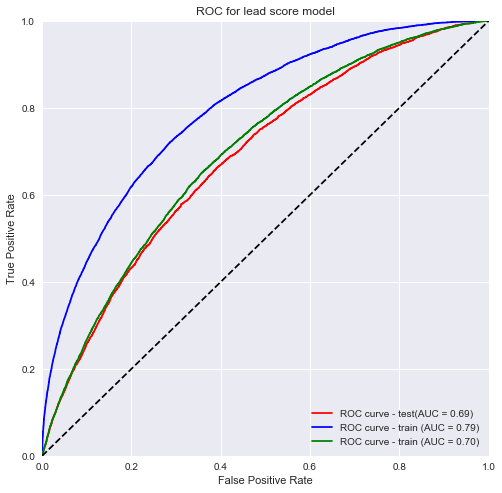

In [90]:
draw_ROC(gbm, dtrain, dvalid, dtest, y_train, y_valid, y_test)

### Distribution of predicted values

In [124]:
y_pred = gbm.predict(dtest)
print (y_pred.max(), y_pred.min(), y_pred.mean())

(0.7245844, 0.0062141353, 0.13520768)


## Tuning Parameters with Bayesian Optimization

In [112]:
from bayes_opt import BayesianOptimization

train_x = df_train[feat]
train_y = df_train.loanstatus

xgtrain = xgb.DMatrix(train_x, label = train_y, missing = np.nan)

def xgb_evaluate(min_child_weight,
                colsample_bytree,
                max_depth,
                subsample,
                gamma):
    params = dict()
    params['objective'] = 'binary:logistic'
    params['eta'] = 0.05
    params['max_depth'] = int(max_depth)
    params['min_child_weight'] = int(min_child_weight)
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    params['verbose_eval'] = False
    
    cv_result = xgb.cv(params, xgtrain,
                      num_boost_round = 100000,
                      nfold = 3,
                      metrics = ('auc'),
                      seed = 12,
                      callbacks = [xgb.callback.early_stop(50)])
    print(cv_result)
    
    return cv_result['test-auc-mean'].max()

In [113]:
xgb_BO = BayesianOptimization(xgb_evaluate,
                             {'max_depth': (4, 8),
                              'min_child_weight': (2, 20),
                              'colsample_bytree': (0.2, 0.8),
                              'subsample': (0.5, 1),
                              'gamma': (0, 2)
                             })

xgb_BO.maximize(init_points = 5, n_iter = 40)

Initialization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[259]	train-auc:0.784464+0.00240285	test-auc:0.689417+0.00358997

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.607976      0.004610        0.623792       0.001518
1         0.633956      0.019009        0.654270       0.013233
2         0.649348      0.016916        0.671260       0.014258
3         0.654003      0.013917        0.677764       0.008810
4         0.663879      0.006775        0.687188       0.004192
5         0.663150      0.006817        0.688040       0.003884
6         0.662972      0.007378        0.689623       0.003650
7         0.667

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[357]	train-auc:0.750974+0.00121587	test-auc:0.690087+0.00311744

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.608019      0.001222        0.614544       0.000723
1         0.645945      0.017946        0.656651       0.017210
2         0.662034      0.004846        0.671694       0.004603
3         0.661915      0.005444        0.672980       0.003465
4         0.666301      0.004944        0.676092       0.000924
5         0.667974      0.005670        0.677884       0.001220
6         0.669142      0.004655        0.679902       0.001173
7         0.669836      0.005144        0.680315       0.001759
8         0.670502      0.004932        0.680563       0.001896
9         0.671614      0.004514        0.681399       0.003110
10        0.672090      0.004011        0.681804       0.003792

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[175]	train-auc:0.834865+0.00177213	test-auc:0.68763+0.0039455

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.612066      0.004329        0.642113       0.000669
1         0.643688      0.015219        0.682549       0.011675
2         0.650045      0.017891        0.692244       0.012379
3         0.654557      0.015044        0.700947       0.006511
4         0.662718      0.006992        0.709738       0.001208
5         0.662516      0.007155        0.713687       0.000847
6         0.663046      0.007279        0.717645       0.000860
7         0.666879      0.005328        0.721063       0.002179
8         0.668178      0.006061        0.723694       0.001457
9         0.670923      0.004751        0.727116       0.003419
10        0.672506      0.004287        0.729324       0.005008
1

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


Bayesian Optimization
---------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   colsample_bytree |     gamma |   max_depth |   min_child_weight |   subsample | 
Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[336]	train-auc:0.737589+0.00117205	test-auc:0.689717+0.00348668

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.600992      0.003846        0.609896       0.001600
1         0.630034      0.021350        0.639218       0.015928
2         0.646502      0.018917        0.657486       0.016183
3         0.651810      0.015328        0.662768       0.011744
4         0.661692      0.006770        0.671873       0.005059
5         0.660080      0.007532        0.671285       0.004788
6         0.659931      0.007508        0.671319       0.004936
7       

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.84920400e-05]), 'nit': 6, 'funcalls': 50}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[527]	train-auc:0.759228+0.00192016	test-auc:0.69048+0.00348728

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.606079      0.002228        0.614042       0.000753
1         0.634819      0.019483        0.643536       0.015535
2         0.649866      0.017702        0.660421       0.016702
3         0.654547      0.013076        0.664683       0.010738
4         0.664326      0.002899        0.673345       0.004458
5         0.663295      0.003707        0.673526       0.004090
6         0.663288      0.005804        0.673683       0.004281
7         0.667673      0.002938        0.677603       0.002794
8         0.668940      0.004025        0.679527       0.003799
9         0.671145      0.002844        0.681427       0.003615
10        0.672039      0.002963        0.682245       0.004223


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[361]	train-auc:0.750995+0.00104723	test-auc:0.68957+0.0036037

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.606134      0.001656        0.613528       0.001082
1         0.633895      0.019590        0.642881       0.015507
2         0.648438      0.019265        0.659231       0.017418
3         0.653523      0.014243        0.663716       0.011431
4         0.663743      0.003606        0.672853       0.004173
5         0.662881      0.004159        0.673181       0.004328
6         0.663095      0.005993        0.673664       0.004277
7         0.667249      0.003105        0.677444       0.002521
8         0.668879      0.004141        0.679741       0.003239
9         0.670980      0.002814        0.681708       0.003324
10        0.671771      0.002864        0.682498       0.004235
1

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  2.45554606e-05]), 'nit': 5, 'funcalls': 50}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[202]	train-auc:0.788215+0.00114337	test-auc:0.688376+0.00354653

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.605613      0.004000        0.626228       0.003941
1         0.631616      0.017901        0.657439       0.012069
2         0.647438      0.015875        0.675263       0.013347
3         0.651377      0.013299        0.683480       0.008487
4         0.661255      0.006609        0.692978       0.005392
5         0.660604      0.006615        0.694618       0.004724
6         0.661015      0.006568        0.696564       0.003707
7         0.665327      0.004645        0.700760       0.003760
8         0.667343      0.004144        0.703348       0.004770
9         0.669758      0.003064        0.706270       0.005934
10        0.670841      0.003227        0.707866       0.006451

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -5.49106664e-05]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)
c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.42028884e-05]), 'nit': 6, 'funcalls': 52}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[543]	train-auc:0.76237+0.00159291	test-auc:0.690554+0.00323538

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.595926      0.002226        0.606873       0.001074
1         0.629844      0.018655        0.639458       0.016272
2         0.647229      0.017456        0.658143       0.017916
3         0.652046      0.012630        0.662504       0.011904
4         0.661953      0.003165        0.670936       0.004523
5         0.660665      0.003778        0.670870       0.005184
6         0.660538      0.004927        0.671371       0.005629
7         0.665425      0.002317        0.676477       0.003120
8         0.666366      0.003796        0.677809       0.004175
9         0.669046      0.003201        0.679988       0.002655
10        0.670353      0.003627        0.681123       0.002945


c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00131121]), 'nit': 4, 'funcalls': 48}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[361]	train-auc:0.750469+0.00134774	test-auc:0.68968+0.00367082

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.606868      0.001234        0.613158       0.000891
1         0.633578      0.019709        0.642997       0.015857
2         0.648855      0.018591        0.659977       0.016873
3         0.653024      0.014652        0.664148       0.011231
4         0.664642      0.004520        0.674274       0.003484
5         0.663240      0.004973        0.674004       0.003731
6         0.663163      0.006585        0.674408       0.004229
7         0.667711      0.003432        0.678264       0.001767
8         0.669009      0.004145        0.680385       0.002834
9         0.671510      0.002522        0.682291       0.002985
10        0.672469      0.002897        0.683099       0.003627


c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00021441]), 'nit': 5, 'funcalls': 56}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[388]	train-auc:0.742008+0.00156945	test-auc:0.690279+0.00384798

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.594618      0.002382        0.603762       0.001277
1         0.627412      0.020779        0.636620       0.016775
2         0.645466      0.019456        0.655620       0.018118
3         0.650331      0.014446        0.660021       0.012011
4         0.659952      0.005070        0.668670       0.005349
5         0.659108      0.005877        0.668510       0.005326
6         0.658677      0.006978        0.668524       0.005764
7         0.663892      0.004308        0.674055       0.002855
8         0.664915      0.005218        0.675217       0.004535
9         0.667817      0.004156        0.677706       0.002572
10        0.668837      0.004434        0.678813       0.002509

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.0001873]), 'nit': 5, 'funcalls': 54}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[286]	train-auc:0.737415+0.000954923	test-auc:0.689971+0.00351287

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.604046      0.001295        0.611690       0.001431
1         0.644534      0.018046        0.654538       0.016885
2         0.648710      0.018506        0.659954       0.017891
3         0.653321      0.016498        0.665658       0.013742
4         0.662414      0.005694        0.673314       0.005530
5         0.661033      0.006611        0.673678       0.006281
6         0.661449      0.006973        0.674507       0.006342
7         0.665528      0.003686        0.677642       0.003602
8         0.666304      0.004007        0.678450       0.004073
9         0.669010      0.002425        0.680689       0.004629
10        0.670531      0.002700        0.681907       0.00510

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00067932]), 'nit': 6, 'funcalls': 63}
  " state: %s" % convergence_dict)
c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00021961]), 'nit': 6, 'funcalls': 56}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[431]	train-auc:0.747731+0.00157388	test-auc:0.690066+0.00375988

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.601060      0.004099        0.609484       0.001761
1         0.630721      0.021932        0.639853       0.016194
2         0.646623      0.019328        0.656989       0.016836
3         0.651811      0.014862        0.661876       0.012072
4         0.661402      0.005171        0.670800       0.005382
5         0.660221      0.005731        0.670712       0.004978
6         0.660042      0.006598        0.671290       0.004573
7         0.664734      0.004750        0.675177       0.002694
8         0.666695      0.004882        0.677262       0.003352
9         0.668992      0.004330        0.679218       0.003058
10        0.669851      0.004678        0.680056       0.003523

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  8.10469064e-05]), 'nit': 3, 'funcalls': 47}
  " state: %s" % convergence_dict)
c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.90287860e-05]), 'nit': 2, 'funcalls': 52}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[257]	train-auc:0.763197+0.00247306	test-auc:0.688928+0.00403039

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.621122      0.003421        0.637600       0.001402
1         0.663000      0.002529        0.680932       0.002854
2         0.668480      0.002883        0.686603       0.003162
3         0.671533      0.004167        0.688798       0.002554
4         0.672219      0.004321        0.689607       0.002500
5         0.672270      0.004954        0.689675       0.002369
6         0.672749      0.005138        0.689602       0.002371
7         0.673039      0.005051        0.689884       0.002629
8         0.673317      0.005132        0.690036       0.002444
9         0.673500      0.005262        0.690261       0.002505
10        0.673425      0.005201        0.690626       0.002746

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[267]	train-auc:0.782965+0.00257973	test-auc:0.687969+0.00380422

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.620008      0.001974        0.638521       0.001443
1         0.661858      0.002434        0.681464       0.002999
2         0.666552      0.004126        0.686173       0.001994
3         0.669045      0.004790        0.688389       0.001680
4         0.669968      0.005319        0.689649       0.001451
5         0.670457      0.005371        0.690123       0.001172
6         0.671007      0.005240        0.690527       0.001347
7         0.671254      0.004777        0.690914       0.001743
8         0.671681      0.004791        0.691130       0.001603
9         0.671833      0.004947        0.691531       0.001725
10        0.671775      0.005010        0.691871       0.001786

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[399]	train-auc:0.745191+0.00119768	test-auc:0.690133+0.00342846

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.600268      0.004904        0.609674       0.002116
1         0.630457      0.021020        0.639253       0.015761
2         0.647145      0.019139        0.657376       0.016641
3         0.651099      0.017071        0.661792       0.012803
4         0.660911      0.007246        0.670890       0.005762
5         0.659316      0.007891        0.670107       0.006451
6         0.659077      0.007567        0.670098       0.005889
7         0.664309      0.003823        0.674536       0.002878
8         0.665873      0.004655        0.676668       0.003972
9         0.668955      0.002625        0.679262       0.003437
10        0.670047      0.002849        0.680438       0.003563

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00035593]), 'nit': 5, 'funcalls': 57}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[437]	train-auc:0.751637+0.00209832	test-auc:0.689581+0.00339558

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.597170      0.001523        0.606106       0.001351
1         0.630897      0.018912        0.639542       0.017130
2         0.647797      0.017911        0.658367       0.018170
3         0.652576      0.012941        0.663138       0.012246
4         0.662319      0.003268        0.671712       0.004269
5         0.661465      0.003949        0.672020       0.004789
6         0.661063      0.005072        0.672226       0.005146
7         0.665589      0.002832        0.677092       0.002688
8         0.666381      0.003855        0.678186       0.003743
9         0.669014      0.003521        0.680305       0.002283
10        0.670271      0.003804        0.681384       0.002957

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.50689515e-05]), 'nit': 7, 'funcalls': 57}
  " state: %s" % convergence_dict)
c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00012457]), 'nit': 4, 'funcalls': 52}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[165]	train-auc:0.801425+0.000645866	test-auc:0.687168+0.00430071

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.606277      0.003641        0.629613       0.001177
1         0.630483      0.019182        0.661132       0.012109
2         0.643988      0.018180        0.679203       0.012423
3         0.649021      0.015676        0.687193       0.007294
4         0.658990      0.008067        0.695725       0.003607
5         0.658553      0.008990        0.698445       0.002596
6         0.658148      0.009285        0.701403       0.001253
7         0.663137      0.006495        0.705803       0.002173
8         0.665835      0.006530        0.710330       0.001535
9         0.668086      0.005392        0.713201       0.002999
10        0.669153      0.004977        0.715357       0.00429

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -3.13420314e-05]), 'nit': 6, 'funcalls': 53}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[223]	train-auc:0.826073+0.00315118	test-auc:0.68839+0.00420541

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.615627      0.003134        0.642998       0.002782
1         0.638949      0.016067        0.674719       0.009992
2         0.653216      0.016627        0.690315       0.011390
3         0.655817      0.014011        0.698712       0.004666
4         0.665205      0.006799        0.707826       0.004628
5         0.664550      0.006663        0.710450       0.003920
6         0.664395      0.007415        0.713117       0.002917
7         0.668658      0.005735        0.716049       0.004139
8         0.670651      0.005112        0.718854       0.004259
9         0.672910      0.004044        0.721089       0.006137
10        0.674079      0.004080        0.722605       0.007246


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[333]	train-auc:0.748079+0.00231093	test-auc:0.690019+0.00396653

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.610140      0.000968        0.619890       0.000237
1         0.658549      0.003048        0.668303       0.002919
2         0.663769      0.004609        0.673798       0.002386
3         0.666589      0.005640        0.676409       0.001773
4         0.667310      0.005626        0.677323       0.001937
5         0.668741      0.005523        0.678494       0.002252
6         0.669191      0.005489        0.678883       0.001825
7         0.669376      0.005374        0.679043       0.002063
8         0.669691      0.005536        0.679424       0.001884
9         0.670146      0.005707        0.679619       0.002148
10        0.670837      0.005981        0.680226       0.002009

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00214409]), 'nit': 6, 'funcalls': 55}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[164]	train-auc:0.806171+0.00407609	test-auc:0.687153+0.00462654

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.622649      0.004751        0.664805       0.002525
1         0.660414      0.003588        0.703808       0.003430
2         0.667245      0.004902        0.710315       0.001234
3         0.670538      0.004777        0.714169       0.001230
4         0.671829      0.004861        0.716304       0.002023
5         0.672945      0.005400        0.717720       0.001631
6         0.673528      0.005270        0.719175       0.001481
7         0.673934      0.004865        0.720334       0.001458
8         0.674286      0.004961        0.721194       0.001171
9         0.674969      0.005058        0.722043       0.001109
10        0.675208      0.005147        0.723076       0.001163

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00022355]), 'nit': 5, 'funcalls': 55}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[406]	train-auc:0.754098+0.00165501	test-auc:0.688687+0.00307534

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.600294      0.005467        0.609803       0.002053
1         0.630049      0.022006        0.639036       0.017009
2         0.646879      0.019238        0.657463       0.016496
3         0.652226      0.015270        0.662391       0.011839
4         0.661541      0.005716        0.670994       0.005123
5         0.660918      0.006365        0.671172       0.004949
6         0.661084      0.006997        0.671528       0.004704
7         0.665670      0.004134        0.675435       0.002186
8         0.667290      0.004772        0.677504       0.003376
9         0.669575      0.003343        0.679766       0.003007
10        0.670495      0.003461        0.680835       0.003596

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[504]	train-auc:0.757317+0.00203858	test-auc:0.690074+0.00295515

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.606584      0.001374        0.614351       0.000534
1         0.634805      0.019214        0.643806       0.015620
2         0.649974      0.017629        0.660641       0.016571
3         0.654721      0.012926        0.664739       0.010726
4         0.664681      0.002830        0.673641       0.004123
5         0.663721      0.003631        0.673881       0.003862
6         0.663618      0.005771        0.673984       0.004017
7         0.667833      0.003164        0.677734       0.002343
8         0.669094      0.004130        0.679714       0.003480
9         0.671232      0.003099        0.681472       0.003012
10        0.672077      0.003164        0.682366       0.003856

Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[246]	train-auc:0.786889+0.00175768	test-auc:0.688242+0.00372564

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.604278      0.000117        0.621986       0.001645
1         0.637399      0.016723        0.656277       0.013351
2         0.652037      0.015745        0.673686       0.014572
3         0.656598      0.011495        0.680155       0.008493
4         0.665387      0.003864        0.687584       0.004675
5         0.664559      0.004622        0.689868       0.003670
6         0.664469      0.005061        0.691463       0.002545
7         0.668034      0.002880        0.696540       0.002465
8         0.668965      0.003637        0.698687       0.002051
9         0.671119      0.003283        0.700616       0.002236
10        0.672489      0.003212        0.702030       0.003688

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00078813]), 'nit': 4, 'funcalls': 53}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[258]	train-auc:0.754739+0.000815362	test-auc:0.689683+0.00399388

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.606928      0.003535        0.616510       0.001244
1         0.634128      0.020523        0.646737       0.014328
2         0.649286      0.018924        0.664071       0.015206
3         0.654820      0.014018        0.669473       0.010172
4         0.663530      0.005465        0.677577       0.005243
5         0.662634      0.006255        0.678011       0.004036
6         0.662395      0.006981        0.678610       0.003346
7         0.666941      0.005099        0.682695       0.002530
8         0.668697      0.004486        0.685275       0.003389
9         0.670807      0.003950        0.687603       0.003496
10        0.671712      0.003977        0.688888       0.00438

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00064555]), 'nit': 4, 'funcalls': 53}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[155]	train-auc:0.785477+0.00136968	test-auc:0.689153+0.0042787

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.614927      0.001134        0.648453       0.002564
1         0.655200      0.004444        0.688095       0.002939
2         0.664182      0.005150        0.699395       0.002353
3         0.669462      0.004644        0.704948       0.002568
4         0.671424      0.004883        0.707911       0.002771
5         0.672596      0.005011        0.709764       0.002612
6         0.673603      0.004866        0.712280       0.001976
7         0.674650      0.004615        0.713597       0.002106
8         0.676135      0.004653        0.714863       0.002291
9         0.676749      0.004937        0.715672       0.002084
10        0.677225      0.005036        0.716454       0.001644


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[291]	train-auc:0.73511+0.00139502	test-auc:0.690143+0.00301278

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.601882      0.002674        0.610836       0.001736
1         0.642126      0.017887        0.651826       0.016348
2         0.647635      0.019030        0.658824       0.016778
3         0.651233      0.017361        0.662678       0.014168
4         0.659178      0.008171        0.669811       0.005337
5         0.658433      0.008412        0.670301       0.006106
6         0.659745      0.008142        0.672006       0.006857
7         0.664303      0.004107        0.675579       0.002779
8         0.664409      0.005391        0.676079       0.002818
9         0.667452      0.003481        0.678532       0.002596
10        0.668548      0.003683        0.679666       0.003106


c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00152648]), 'nit': 3, 'funcalls': 52}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[398]	train-auc:0.747283+0.00218979	test-auc:0.689954+0.00317976

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.597691      0.003070        0.606578       0.000687
1         0.631056      0.018935        0.639686       0.016760
2         0.647624      0.017588        0.658306       0.017925
3         0.652381      0.012858        0.663086       0.012140
4         0.662067      0.003333        0.671533       0.004328
5         0.661382      0.003864        0.671864       0.004788
6         0.661372      0.004749        0.672292       0.004324
7         0.665663      0.002711        0.677134       0.002045
8         0.666459      0.003709        0.678259       0.002991
9         0.669025      0.003521        0.680259       0.001825
10        0.670248      0.003774        0.681292       0.002787

c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([-0.00776693]), 'nit': 3, 'funcalls': 52}
  " state: %s" % convergence_dict)
c:\users\tong\anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -9.66528314e-05]), 'nit': 4, 'funcalls': 53}
  " state: %s" % convergence_dict)


Multiple eval metrics have been passed: 'test-auc' will be used for early stopping.

Will train until test-auc hasn't improved in 50 rounds.
Stopping. Best iteration:
[344]	train-auc:0.746506+0.0016431	test-auc:0.690254+0.00363191

     test-auc-mean  test-auc-std  train-auc-mean  train-auc-std
0         0.609154      0.001171        0.618301       0.001415
1         0.659143      0.003901        0.667966       0.002769
2         0.664555      0.005164        0.673875       0.002805
3         0.667445      0.005841        0.676373       0.002461
4         0.668066      0.006093        0.677032       0.002349
5         0.668726      0.006493        0.677533       0.002353
6         0.669309      0.006298        0.678374       0.001908
7         0.669396      0.005933        0.678676       0.002350
8         0.669918      0.006129        0.679136       0.002108
9         0.670475      0.006165        0.679359       0.002227
10        0.670974      0.006366        0.679876       0.002139


In [121]:
newparams = {"objective": "binary:logistic", 
          "booster" : "gbtree", 
          "eta": 0.01, 
          "max_depth": 4, 
          "subsample": 0.9249, 
          "colsample_bytree": 0.2038,          
          "seed": 1234, 
          "eval_metric": "auc",
          "gamma": 1.1423, 
          "min_child_weight": 14.6501} 

In [122]:
gbm2 = xgb.train(newparams, dtrain, num_boost_round, evals=watchlist,\
  early_stopping_rounds= 50)

[0]	train-auc:0.652355	eval-auc:0.658017
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 50 rounds.
[1]	train-auc:0.655739	eval-auc:0.657212
[2]	train-auc:0.661056	eval-auc:0.662667
[3]	train-auc:0.664009	eval-auc:0.666095
[4]	train-auc:0.664034	eval-auc:0.666358
[5]	train-auc:0.665234	eval-auc:0.667966
[6]	train-auc:0.66921	eval-auc:0.670635
[7]	train-auc:0.671172	eval-auc:0.671011
[8]	train-auc:0.67125	eval-auc:0.670875
[9]	train-auc:0.67511	eval-auc:0.674263
[10]	train-auc:0.676865	eval-auc:0.675676
[11]	train-auc:0.678701	eval-auc:0.677289
[12]	train-auc:0.679993	eval-auc:0.678116
[13]	train-auc:0.681077	eval-auc:0.678676
[14]	train-auc:0.680349	eval-auc:0.678457
[15]	train-auc:0.681134	eval-auc:0.678826
[16]	train-auc:0.680213	eval-auc:0.678585
[17]	train-auc:0.679462	eval-auc:0.677996
[18]	train-auc:0.678786	eval-auc:0.677451
[19]	train-auc:0.679429	eval-auc:0.677443
[20]	train-auc:0.680473	eval-auc

[191]	train-auc:0.689445	eval-auc:0.683017
[192]	train-auc:0.68961	eval-auc:0.683139
[193]	train-auc:0.68958	eval-auc:0.683126
[194]	train-auc:0.689688	eval-auc:0.683207
[195]	train-auc:0.689646	eval-auc:0.683186
[196]	train-auc:0.689771	eval-auc:0.683295
[197]	train-auc:0.689725	eval-auc:0.683256
[198]	train-auc:0.689783	eval-auc:0.683254
[199]	train-auc:0.689835	eval-auc:0.683352
[200]	train-auc:0.689974	eval-auc:0.683454
[201]	train-auc:0.690047	eval-auc:0.683467
[202]	train-auc:0.690028	eval-auc:0.683453
[203]	train-auc:0.690151	eval-auc:0.683522
[204]	train-auc:0.690093	eval-auc:0.683495
[205]	train-auc:0.690057	eval-auc:0.683517
[206]	train-auc:0.690165	eval-auc:0.683541
[207]	train-auc:0.69012	eval-auc:0.683521
[208]	train-auc:0.690116	eval-auc:0.683531
[209]	train-auc:0.690217	eval-auc:0.683635
[210]	train-auc:0.690174	eval-auc:0.683645
[211]	train-auc:0.690178	eval-auc:0.683655
[212]	train-auc:0.690179	eval-auc:0.683683
[213]	train-auc:0.690323	eval-auc:0.683759
[214]	train-au

[383]	train-auc:0.697661	eval-auc:0.68747
[384]	train-auc:0.697658	eval-auc:0.687476
[385]	train-auc:0.697706	eval-auc:0.687489
[386]	train-auc:0.697752	eval-auc:0.687528
[387]	train-auc:0.697828	eval-auc:0.687566
[388]	train-auc:0.697889	eval-auc:0.687608
[389]	train-auc:0.697954	eval-auc:0.687682
[390]	train-auc:0.698	eval-auc:0.687724
[391]	train-auc:0.698056	eval-auc:0.687744
[392]	train-auc:0.698115	eval-auc:0.687775
[393]	train-auc:0.698153	eval-auc:0.68779
[394]	train-auc:0.698224	eval-auc:0.687804
[395]	train-auc:0.698305	eval-auc:0.687829
[396]	train-auc:0.698369	eval-auc:0.687835
[397]	train-auc:0.698444	eval-auc:0.687878
[398]	train-auc:0.698449	eval-auc:0.687873
[399]	train-auc:0.6985	eval-auc:0.687874
[400]	train-auc:0.698563	eval-auc:0.687893
[401]	train-auc:0.698586	eval-auc:0.687919
[402]	train-auc:0.698666	eval-auc:0.687964
[403]	train-auc:0.698683	eval-auc:0.687959
[404]	train-auc:0.698749	eval-auc:0.687986
[405]	train-auc:0.698822	eval-auc:0.688021
[406]	train-auc:0.

[575]	train-auc:0.705978	eval-auc:0.690927
[576]	train-auc:0.706026	eval-auc:0.690924
[577]	train-auc:0.706081	eval-auc:0.690943
[578]	train-auc:0.706113	eval-auc:0.690952
[579]	train-auc:0.70614	eval-auc:0.690947
[580]	train-auc:0.706169	eval-auc:0.690954
[581]	train-auc:0.706203	eval-auc:0.690952
[582]	train-auc:0.706231	eval-auc:0.690957
[583]	train-auc:0.706266	eval-auc:0.690963
[584]	train-auc:0.706316	eval-auc:0.690956
[585]	train-auc:0.706371	eval-auc:0.690965
[586]	train-auc:0.706425	eval-auc:0.690989
[587]	train-auc:0.706483	eval-auc:0.69101
[588]	train-auc:0.706526	eval-auc:0.690995
[589]	train-auc:0.706566	eval-auc:0.691016
[590]	train-auc:0.706589	eval-auc:0.691021
[591]	train-auc:0.706657	eval-auc:0.691047
[592]	train-auc:0.706718	eval-auc:0.691075
[593]	train-auc:0.706787	eval-auc:0.691096
[594]	train-auc:0.70682	eval-auc:0.691108
[595]	train-auc:0.706857	eval-auc:0.691113
[596]	train-auc:0.70691	eval-auc:0.691135
[597]	train-auc:0.706943	eval-auc:0.691147
[598]	train-auc

[767]	train-auc:0.713591	eval-auc:0.693353
[768]	train-auc:0.713626	eval-auc:0.693363
[769]	train-auc:0.713677	eval-auc:0.693393
[770]	train-auc:0.713721	eval-auc:0.693407
[771]	train-auc:0.713764	eval-auc:0.693413
[772]	train-auc:0.713796	eval-auc:0.693423
[773]	train-auc:0.713827	eval-auc:0.69343
[774]	train-auc:0.713852	eval-auc:0.693433
[775]	train-auc:0.713871	eval-auc:0.693436
[776]	train-auc:0.713905	eval-auc:0.693451
[777]	train-auc:0.713937	eval-auc:0.693454
[778]	train-auc:0.713987	eval-auc:0.693466
[779]	train-auc:0.714028	eval-auc:0.69348
[780]	train-auc:0.714043	eval-auc:0.693485
[781]	train-auc:0.71409	eval-auc:0.693497
[782]	train-auc:0.714131	eval-auc:0.693502
[783]	train-auc:0.714166	eval-auc:0.693498
[784]	train-auc:0.714188	eval-auc:0.693503
[785]	train-auc:0.714211	eval-auc:0.693518
[786]	train-auc:0.714236	eval-auc:0.693531
[787]	train-auc:0.714266	eval-auc:0.693538
[788]	train-auc:0.714282	eval-auc:0.693549
[789]	train-auc:0.714292	eval-auc:0.693554
[790]	train-au

[959]	train-auc:0.719903	eval-auc:0.694833
[960]	train-auc:0.719938	eval-auc:0.694829
[961]	train-auc:0.719961	eval-auc:0.694832
[962]	train-auc:0.719992	eval-auc:0.694829
[963]	train-auc:0.720024	eval-auc:0.694829
[964]	train-auc:0.72005	eval-auc:0.694831
[965]	train-auc:0.720082	eval-auc:0.694846
[966]	train-auc:0.720125	eval-auc:0.69487
[967]	train-auc:0.720141	eval-auc:0.694876
[968]	train-auc:0.72019	eval-auc:0.694874
[969]	train-auc:0.720226	eval-auc:0.69488
[970]	train-auc:0.720262	eval-auc:0.694885
[971]	train-auc:0.720273	eval-auc:0.694889
[972]	train-auc:0.720307	eval-auc:0.694896
[973]	train-auc:0.720345	eval-auc:0.694911
[974]	train-auc:0.720363	eval-auc:0.694911
[975]	train-auc:0.7204	eval-auc:0.694915
[976]	train-auc:0.720428	eval-auc:0.694919
[977]	train-auc:0.720458	eval-auc:0.694932
[978]	train-auc:0.720488	eval-auc:0.694928
[979]	train-auc:0.720523	eval-auc:0.694929
[980]	train-auc:0.720553	eval-auc:0.694931
[981]	train-auc:0.720583	eval-auc:0.694922
[982]	train-auc:0

[1148]	train-auc:0.725388	eval-auc:0.695788
[1149]	train-auc:0.725416	eval-auc:0.695807
[1150]	train-auc:0.725446	eval-auc:0.695796
[1151]	train-auc:0.725461	eval-auc:0.695796
[1152]	train-auc:0.725489	eval-auc:0.6958
[1153]	train-auc:0.725513	eval-auc:0.6958
[1154]	train-auc:0.725546	eval-auc:0.695809
[1155]	train-auc:0.725581	eval-auc:0.69583
[1156]	train-auc:0.725594	eval-auc:0.695836
[1157]	train-auc:0.725624	eval-auc:0.695834
[1158]	train-auc:0.725661	eval-auc:0.695829
[1159]	train-auc:0.725675	eval-auc:0.695834
[1160]	train-auc:0.725706	eval-auc:0.695852
[1161]	train-auc:0.725726	eval-auc:0.695853
[1162]	train-auc:0.725754	eval-auc:0.695863
[1163]	train-auc:0.725778	eval-auc:0.695854
[1164]	train-auc:0.725794	eval-auc:0.695856
[1165]	train-auc:0.725824	eval-auc:0.695865
[1166]	train-auc:0.725856	eval-auc:0.695861
[1167]	train-auc:0.725885	eval-auc:0.695851
[1168]	train-auc:0.725905	eval-auc:0.695851
[1169]	train-auc:0.725949	eval-auc:0.69586
[1170]	train-auc:0.725962	eval-auc:0.6

[1336]	train-auc:0.729984	eval-auc:0.69638
[1337]	train-auc:0.730005	eval-auc:0.696392
[1338]	train-auc:0.730031	eval-auc:0.696386
[1339]	train-auc:0.730056	eval-auc:0.696375
[1340]	train-auc:0.730093	eval-auc:0.696375
[1341]	train-auc:0.730096	eval-auc:0.69637
[1342]	train-auc:0.730122	eval-auc:0.696376
[1343]	train-auc:0.730157	eval-auc:0.696389
[1344]	train-auc:0.730166	eval-auc:0.696398
[1345]	train-auc:0.730194	eval-auc:0.696405
[1346]	train-auc:0.730223	eval-auc:0.696414
[1347]	train-auc:0.730249	eval-auc:0.696407
[1348]	train-auc:0.730288	eval-auc:0.696394
[1349]	train-auc:0.730318	eval-auc:0.696392
[1350]	train-auc:0.730324	eval-auc:0.69639
[1351]	train-auc:0.730333	eval-auc:0.696393
[1352]	train-auc:0.730366	eval-auc:0.696396
[1353]	train-auc:0.730389	eval-auc:0.696394
[1354]	train-auc:0.730425	eval-auc:0.696394
[1355]	train-auc:0.730455	eval-auc:0.696404
[1356]	train-auc:0.730488	eval-auc:0.696396
[1357]	train-auc:0.730516	eval-auc:0.6964
[1358]	train-auc:0.730535	eval-auc:0.

### ROC curve

Area under the ROC curve - validation: 0.696614
Area under the ROC curve - train: 0.732249
Area under the ROC curve - test: 0.698357


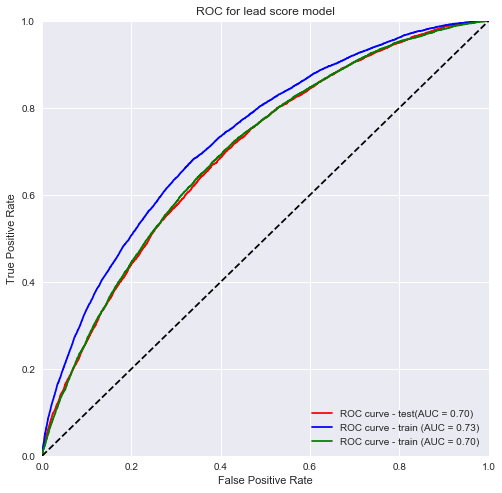

In [123]:
draw_ROC(gbm2, dtrain, dvalid, dtest, y_train, y_valid, y_test)

### Distribution of predicted values

In [125]:
y_pred = gbm2.predict(dtest)
print (y_pred.max(), y_pred.min(), y_pred.mean())

(0.55842352, 0.0097351847, 0.13516958)


### Feature importance

In [126]:
importance=gbm2.get_fscore()
df_importance = pd.DataFrame(importance.items(), columns=['feature', 'fscore'])

In [127]:
df_importance['fscore'] = df_importance['fscore'] / df_importance['fscore'].sum()

df_importance.sort_values(['fscore'], ascending=False, inplace=True)
df_importance

,feature,fscore
53,dti,0.037661
68,installment,0.034974
5,annualinc,0.033063
59,intrate,0.030945
46,mosinoldrevtlop,0.029343
8,accopenpast24mths,0.028155
32,zipcode,0.027794
14,subgrade,0.026450
37,tothicredlim,0.025779
65,loanamnt,0.025469


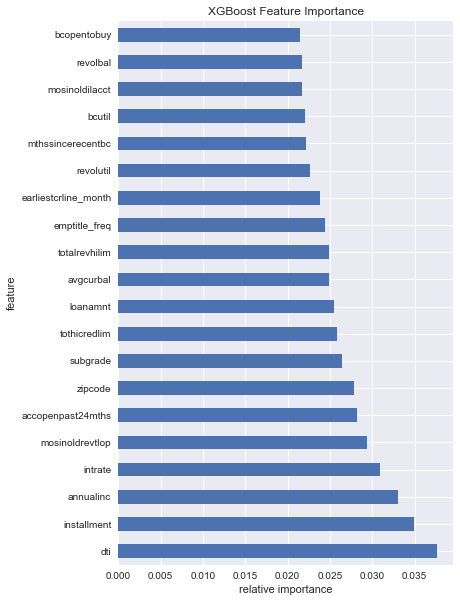

In [128]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance[:20].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [129]:
grade_importance = df_importance.query("feature=='grade'")
grade_importance

,feature,fscore
7,grade,0.01369


In [130]:
subgrade_importance = df_importance.query("feature=='subgrade'")
subgrade_importance

,feature,fscore
14,subgrade,0.02645


In [131]:
intrate_importance = df_importance.query("feature=='intrate'")
intrate_importance

,feature,fscore
59,intrate,0.030945


In [132]:
df_importance.query("feature=='loanamnt'")

,feature,fscore
65,loanamnt,0.025469


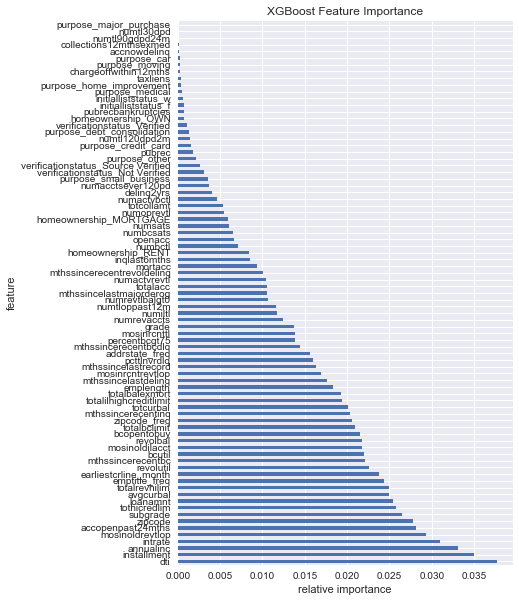

In [133]:
plt.figure(figsize=(32, 32))
# df_importance.plot()
df_importance.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

## Save model

In [103]:
import pickle

In [106]:
with open('model.pkl', 'w') as outfile:
  
    pickle.dump(gbm2, outfile)